## 앙상블 모델과 단일 모델 성능 비교 <hr>
- 데이터 : sklearn.datasets의 breast_cancer
- 유 형 : 지도학습 + 분류
- 방 법 : LogisticRegression, DecisionTree, RandomForest

[1] 모듈 로딩 및 데이터 준비 <hr>

In [21]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [22]:
x,y = load_breast_cancer(as_frame=True, return_X_y=True)
x.shape, y.shape

((569, 30), (569,))

In [23]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,
                                             test_size=0.2,
                                             random_state=5,
                                             stratify=y)

[2] 학습 진행 <hr>

[2-1] 선형 회귀 LogisticRegression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(xtrain,ytrain)

LogisticRegression(solver='liblinear')

[2-2] DecisionTree 알고리즘 기반 분류

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dt_model = DecisionTreeClassifier(random_state=5)
dt_model.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=5)

[2-3] Ensemble 알고리즘 기반 분류

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rf_model = RandomForestClassifier(random_state=5, oob_score=True)
rf_model.fit(xtrain, ytrain)

RandomForestClassifier(random_state=5)

- 3개 알고리즘 모델에 대한 성능 평가

In [30]:
print(f'[Logistic Regression] Train score: {lr_model.score(xtrain,ytrain)} Test score: {lr_model.score(xtest,ytest)}')
print(f'[DecisionTreeClassifier] Train score: {dt_model.score(xtrain, ytrain)} Test score: {dt_model.score(xtest,ytest)}') # 과대적합
print(f'[RandomForestClassifier] Train score: {rf_model.score(xtrain,ytrain)} Test score: {rf_model.score(xtest,ytest)}')  # 과대적합

[Logistic Regression] Train score: 0.9582417582417583 Test score: 0.9649122807017544
[DecisionTreeClassifier] Train score: 1.0 Test score: 0.9210526315789473
[RandomForestClassifier] Train score: 1.0 Test score: 0.9649122807017544


In [43]:
import_feature = pd.Series(rf_model.feature_importances_, index=rf_model.feature_names_in_)
import_feature.sort_values(ascending=True, inplace=True)

<Axes: >

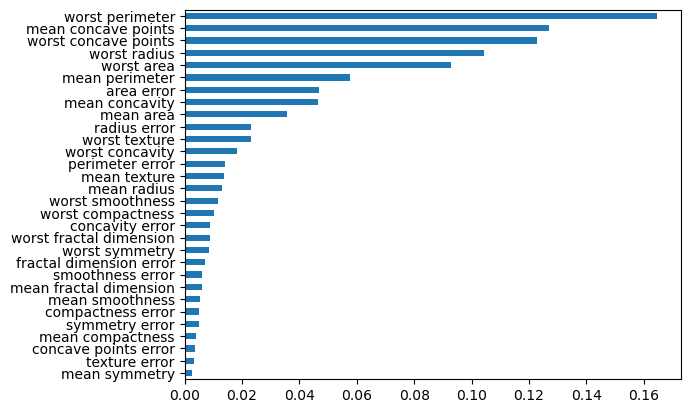

In [44]:
import_feature.plot(kind = 'barh')

In [45]:
import XGBoost

ModuleNotFoundError: No module named 'XGBoost'